# Random Forest Classifier

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Define the size of the images
img_size = (224, 224)

In [3]:
# Define the path to the dataset directory
data_dir = 'Covid19-dataset/train'

# Define the labels and the corresponding integer codes
labels = {"Covid": 0, "Normal": 1}

In [4]:
# Initialize the lists to store the images and labels
images = []
labels_list = []

In [5]:
# Loop over the images in each category
for label, code in labels.items():
    dir_path = os.path.join(data_dir, label)
    for img_name in os.listdir(dir_path):
        img_path = os.path.join(dir_path, img_name)
        if not os.path.exists(img_path):
            continue
        #print(f"Reading image from path: {img_path}")
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        if img is None:
            #print(f"Could not read image from path: {img_path}")
            continue
        img = cv2.resize(img, img_size)
        # Append the image and its label to the lists
        images.append(img)
        labels_list.append(code)

In [6]:
print(len(images))

181


In [7]:
# Convert the images and labels lists to numpy arrays
X = np.array(images)
y = np.array(labels_list)

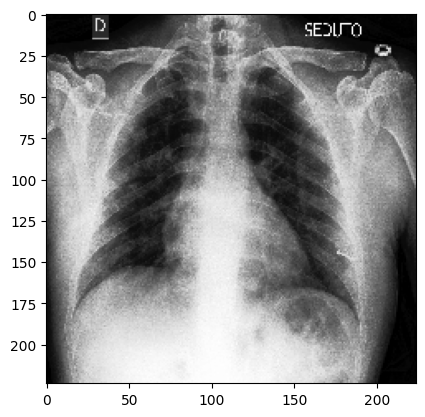

In [8]:
plt.imshow(X[0], cmap='gray')

In [9]:
# Split the dataset into training and testing sets

# X_train and y_train are used to train the machine learning model, 
# while X_test and y_test are used to evaluate the model's performance on unseen data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [10]:
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [11]:
# Define the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [12]:
# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [14]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.972972972972973


In [15]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.93      0.97        15

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



In [16]:
# Load a new image to predict its label
new_img_path = "Covid19-dataset/test/Normal/0105.jpeg"
if not os.path.exists(new_img_path):
    print(f"Could not find image at path: {new_img_path}")
    exit(1)
new_img = cv2.imread(new_img_path)
if new_img is None:
    print(f"Could not read image from path: {new_img_path}")
    exit(1)
new_img = cv2.resize(new_img, img_size)

In [17]:
# Flatten the image
new_img = new_img.reshape(1, -1)

# Predict the label of the new image
new_img_label = clf.predict(new_img)

# Print the predicted label
for label, code in labels.items():
    if code == new_img_label:
        print("Predicted label:", label)
        break

Predicted label: Normal


# SVM Classifier

In [18]:
# Define the classifier
clf = SVC(kernel='linear', random_state=42)

In [19]:
# Train the classifier
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [20]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [21]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9459459459459459


In [22]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.93      0.93      0.93        15

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37



In [23]:
# Load a new image to predict its label
new_img_path = "Covid19-dataset/test/Covid/0100.jpeg"
if not os.path.exists(new_img_path):
    print(f"Could not find image at path: {new_img_path}")
    exit(1)
new_img = cv2.imread(new_img_path)
if new_img is None:
    print(f"Could not read image from path: {new_img_path}")
    exit(1)
new_img = cv2.resize(new_img, img_size)

In [24]:
# Flatten the image
new_img = new_img.reshape(1, -1)

# Predict the label of the new image
new_img_label = clf.predict(new_img)

# Print the predicted label
for label, code in labels.items():
    if code == new_img_label:
        print("Predicted label:", label)
        break

Predicted label: Covid


# Logistic Regression

In [25]:
# Create the logistic regression classifier
clf = LogisticRegression(random_state=42)

In [26]:
# Train the classifier
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [27]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [28]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.972972972972973


In [29]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.93      0.97        15

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



In [30]:
# Load a new image to predict its label
new_img_path = "Covid19-dataset/test/Covid/0100.jpeg"
if not os.path.exists(new_img_path):
    print(f"Could not find image at path: {new_img_path}")
    exit(1)
new_img = cv2.imread(new_img_path)
if new_img is None:
    print(f"Could not read image from path: {new_img_path}")
    exit(1)
new_img = cv2.resize(new_img, img_size)

In [31]:
# Flatten the image
new_img = new_img.reshape(1, -1)

# Predict the label of the new image
new_img_label = clf.predict(new_img)

# Print the predicted label
for label, code in labels.items():
    if code == new_img_label:
        print("Predicted label:", label)
        break

Predicted label: Covid
